In [143]:
!ls

sample_data  summer_intern_sinica2019


In [144]:
!git clone -l -s https://github.com/erics910085/summer_intern_sinica2019.git

fatal: destination path 'summer_intern_sinica2019' already exists and is not an empty directory.


In [0]:
file=open('summer_intern_sinica2019/MCMC/encryption.txt','r')

In [179]:
encryp=file.read().replace("\n","") #remove \n
file.close()
encryp=encryp.upper()
encryp

'ABVUNR DQR OBVEYBDEXRHGESBQHGFE XOSEZNBWQGPE XOSEOSEVB ERVEGRSYEGTGNAOSGEOKEYBDESBQHGFEO EWYEJNO OVUEYBDNEBJVEABFGEYBDEPDS EXRHGEWGGVEKRPOQORNEJO XE XGEPR GNORQE RDUX EOVE XOSESGPGS GNEEEXBZGE XR EYBDEGVCBYE XOSEABDNSGERVFE XR E XGEPG XBFSEYBDEQGRNVGFE '

#Reference plain text

In [0]:
file=open('summer_intern_sinica2019/MCMC/world_and_peace.txt','r')

In [0]:
origin=file.read()
file.close()
origin
ref=origin.upper()
ref

In [0]:
import numpy as np
import pandas as pd
import string
import matplotlib.pyplot as plt

In [0]:
#Set the index
letter=list(string.ascii_uppercase[0:26])+[' ']

In [166]:
#create the transistion matrix by counting each char and the next char
#notice that since we are going to compute probability, we will make sure that every char is at least once to avoid the probabilitiy getting 0.
count=np.ones((27,27))
tran=pd.DataFrame(count, columns=letter, index=letter)
for i in range(len(ref)-1):
  if (i%100000==0):
    print(i)
  if ref[i] in letter: 
    if ref[i+1] in letter:
      if ref[i]!=' ' or ref[i+1]!=' ':
        tran[ref[i+1]][ref[i]]+=1  
    else:
      tran[ref[i]][' ']+=1
  else:
    if ref[i+1] in letter and ref[i+1]!=' ':
      tran[ref[i+1]][' ']+=1
tran

0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2300000
2400000
2500000
2600000
2700000
2800000
2900000
3000000
3100000
3200000


,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z,
A,8.0,3771.0,7586.0,12179.0,87.0,1810.0,3641.0,354.0,9709.0,183.0,2767.0,15472.0,5070.0,49786.0,47.0,5366.0,3.0,19278.0,21356.0,30409.0,2797.0,4727.0,2346.0,56.0,5665.0,364.0,13732.0
B,3384.0,258.0,5.0,19.0,12377.0,1.0,1.0,2.0,1064.0,187.0,1.0,3942.0,70.0,12.0,4571.0,1.0,1.0,2159.0,502.0,270.0,5745.0,54.0,21.0,1.0,2731.0,1.0,125.0
C,7293.0,1.0,1108.0,13.0,14537.0,1.0,1.0,13005.0,2802.0,1.0,2829.0,2210.0,3.0,1.0,14075.0,1.0,127.0,2236.0,106.0,4465.0,1818.0,1.0,8.0,1.0,362.0,6.0,517.0
D,2629.0,14.0,11.0,1451.0,15001.0,96.0,460.0,61.0,8405.0,253.0,82.0,1355.0,369.0,320.0,5483.0,5.0,47.0,3975.0,2438.0,49.0,1210.0,330.0,51.0,1.0,1320.0,4.0,68639.0
E,14618.0,281.0,5861.0,31173.0,8586.0,3414.0,2378.0,787.0,3709.0,93.0,290.0,11045.0,7598.0,28353.0,1702.0,3719.0,281.0,48680.0,21412.0,8115.0,365.0,5794.0,3449.0,3437.0,4010.0,200.0,99464.0
F,4297.0,30.0,1.0,1.0,4920.0,3019.0,1.0,4.0,4980.0,1.0,10.0,1289.0,3.0,6.0,8739.0,1.0,1.0,6090.0,162.0,2334.0,2051.0,1.0,31.0,1.0,95.0,1.0,18351.0
G,3634.0,2.0,1.0,44.0,6340.0,1.0,491.0,6527.0,2765.0,1.0,1.0,1670.0,20.0,1009.0,3403.0,1.0,1.0,2985.0,933.0,181.0,1468.0,1.0,20.0,1.0,103.0,3.0,19521.0
H,30217.0,68.0,63.0,66.0,81646.0,80.0,2.0,7.0,28220.0,1.0,97.0,164.0,403.0,120.0,14878.0,6.0,1.0,1397.0,168.0,4540.0,1729.0,5.0,39.0,1.0,967.0,1.0,13412.0
I,3164.0,1365.0,9333.0,9563.0,9309.0,4123.0,4702.0,7.0,705.0,1.0,1397.0,8785.0,10613.0,52927.0,7829.0,953.0,30.0,6409.0,23218.0,23118.0,135.0,3717.0,5.0,386.0,2.0,614.0,4959.0
J,110.0,1.0,1.0,1.0,606.0,1.0,1.0,1.0,13.0,1.0,1.0,1.0,1.0,1.0,777.0,1.0,1.0,1.0,1.0,1.0,1313.0,1.0,1.0,1.0,1.0,1.0,1.0


In [0]:
sumrow=pd.DataFrame.sum(tran,axis=1)

In [168]:
prob=pd.DataFrame.div(tran,sumrow,axis=0)
prob

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z,
A,0.000037,0.017253,0.034708,0.055722,0.000398,0.008281,0.016658,0.001620,0.044421,0.000837,0.012660,0.070788,0.023196,0.227782,0.000215,0.024551,0.000014,0.088201,0.097708,0.139128,0.012797,0.021627,0.010733,0.000256,0.025919,0.001665,0.062827
B,0.090228,0.006879,0.000133,0.000507,0.330009,0.000027,0.000027,0.000053,0.028370,0.004986,0.000027,0.105106,0.001866,0.000320,0.121877,0.000027,0.000027,0.057566,0.013385,0.007199,0.153180,0.001440,0.000560,0.000027,0.072817,0.000027,0.003333
C,0.108000,0.000015,0.016408,0.000193,0.215274,0.000015,0.000015,0.192587,0.041494,0.000015,0.041894,0.032727,0.000044,0.000015,0.208432,0.000015,0.001881,0.033112,0.001570,0.066121,0.026922,0.000015,0.000118,0.000015,0.005361,0.000089,0.007656
D,0.023049,0.000123,0.000096,0.012721,0.131520,0.000842,0.004033,0.000535,0.073690,0.002218,0.000719,0.011880,0.003235,0.002806,0.048072,0.000044,0.000412,0.034850,0.021375,0.000430,0.010609,0.002893,0.000447,0.000009,0.011573,0.000035,0.601785
E,0.045851,0.000881,0.018384,0.097778,0.026931,0.010708,0.007459,0.002469,0.011634,0.000292,0.000910,0.034644,0.023832,0.088933,0.005339,0.011665,0.000881,0.152691,0.067161,0.025454,0.001145,0.018174,0.010818,0.010781,0.012578,0.000627,0.311981
F,0.076161,0.000532,0.000018,0.000018,0.087203,0.053509,0.000018,0.000071,0.088267,0.000018,0.000177,0.022847,0.000053,0.000106,0.154892,0.000018,0.000018,0.107940,0.002871,0.041368,0.036352,0.000018,0.000549,0.000018,0.001684,0.000018,0.325257
G,0.071078,0.000039,0.000020,0.000861,0.124005,0.000020,0.009604,0.127662,0.054081,0.000020,0.000020,0.032664,0.000391,0.019735,0.066560,0.000020,0.000020,0.058384,0.018249,0.003540,0.028713,0.000020,0.000391,0.000020,0.002015,0.000059,0.381814
H,0.169475,0.000381,0.000353,0.000370,0.457919,0.000449,0.000011,0.000039,0.158274,0.000006,0.000544,0.000920,0.002260,0.000673,0.083445,0.000034,0.000006,0.007835,0.000942,0.025463,0.009697,0.000028,0.000219,0.000006,0.005424,0.000006,0.075222
I,0.016886,0.007285,0.049811,0.051038,0.049683,0.022005,0.025095,0.000037,0.003763,0.000005,0.007456,0.046886,0.056642,0.282475,0.041784,0.005086,0.000160,0.034205,0.123916,0.123382,0.000721,0.019838,0.000027,0.002060,0.000011,0.003277,0.026466
J,0.038719,0.000352,0.000352,0.000352,0.213305,0.000352,0.000352,0.000352,0.004576,0.000352,0.000352,0.000352,0.000352,0.000352,0.273495,0.000352,0.000352,0.000352,0.000352,0.000352,0.462161,0.000352,0.000352,0.000352,0.000352,0.000352,0.000352


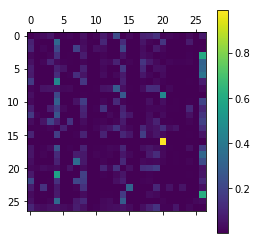

In [169]:
plt.matshow(prob);
plt.colorbar()
plt.show()

#Decode

In [0]:
import math

In [0]:
#calculating the log-probabiltiy 
def log_prob(encryp,decode):
  logprob=0
  for i in range(len(encryp)-1):
    if (prob[decode[encryp[i+1]]][decode[encryp[i]]]==0):
      print([decode[encryp[i+1]]],[decode[encryp[i]]])
      logprob=0
      break;
    else:
      logprob+= math.log(prob[decode[encryp[i+1]]][decode[encryp[i]]])
      #print(logprob)
  return(logprob)
                     

In [0]:
#decoder
def decode(string,decrpyt):
  decoder=''
  for char in string:
    decoder+=decrpyt[char]
  return (decoder)

In [180]:
i=0
tempdecrpt=np.random.permutation(letter)
dict_1=dict(zip(letter,tempdecrpt))
maxiter=2000
while (i<maxiter):
  newdecrpt=np.copy(tempdecrpt)
  a,b=np.random.choice(26,2,replace=False)
  newdecrpt[[a,b]]=newdecrpt[[b,a]]
  dict_2=dict(zip(letter,newdecrpt))
  if (math.log(np.random.uniform())<(log_prob(encryp,dict_2)-log_prob(encryp,dict_1))):
    tempdecrpt=newdecrpt
    dict_1=dict_2
    print(decode(encryp,dict_1))
    i+=1

AWJ VBSELBSKWJNFWENYBRGNXWLRGONSYKXNDVWULGCNSYKXNKXNJWSNBJNGBXFNGPGVAKXGNKZNFWENXWLRGONKSNUFNMVKSKJ NFWEVNWMJNAWOGNFWENCEXSNYBRGNUGGJNZBCKLKBVNMKSYNSYGNCBSGVKBLNSBE YSNKJNSYKXNXGCGXSGVNNNYWDGNSYBSNFWENGJHWFNSYKXNAWEVXGNBJONSYBSNSYGNCGSYWOXNFWENLGBVJGONS
AWJ IBSELBSKWJNFWENYBRGNXWLRGONSYKXNDIWULGCNSYKXNKXNJWSNBJNGBXFNGPGIAKXGNKZNFWENXWLRGONKSNUFNMIKSKJ NFWEINWMJNAWOGNFWENCEXSNYBRGNUGGJNZBCKLKBINMKSYNSYGNCBSGIKBLNSBE YSNKJNSYKXNXGCGXSGINNNYWDGNSYBSNFWENGJHWFNSYKXNAWEIXGNBJONSYBSNSYGNCGSYWOXNFWENLGBIJGONS
AWJ EBSILBSKWJNFWINYBRGNXWLRGONSYKXNDEWULGCNSYKXNKXNJWSNBJNGBXFNGPGEAKXGNKZNFWINXWLRGONKSNUFNMEKSKJ NFWIENWMJNAWOGNFWINCIXSNYBRGNUGGJNZBCKLKBENMKSYNSYGNCBSGEKBLNSBI YSNKJNSYKXNXGCGXSGENNNYWDGNSYBSNFWINGJHWFNSYKXNAWIEXGNBJONSYBSNSYGNCGSYWOXNFWINLGBEJGONS
AWJ EBSILBSKWJNFWINYBRGNMWLRGONSYKMNDEWULGCNSYKMNKMNJWSNBJNGBMFNGPGEAKMGNKZNFWINMWLRGONKSNUFNXEKSKJ NFWIENWXJNAWOGNFWINCIMSNYBRGNUGGJNZBCKLKBENXKSYNSYGNCBSGEKBLNSBI YSNKJNSYKMNMGCGMSGENNNYWDGNSYBSNFWINGJHWFNSYKMNAWIEMGNBJONSYBSNSYGNCGSYWO

In [49]:
encryp

'ABVUNR DQR OBVEYBDEXRHGESBQHGFE XOSEZNBWQGPE XOSEOSEVB ERVEGRSYEGTGNAOSGEOKEYBDESBQHGFEO EWYEJNO OVUEYBDNEBJVEABFGEYBDEPDS EXRHGEWGGVEKRPOQORNEJO XE XGEPR GNORQE RDUX EOVE XOSESGPGS GNEEEXBZGE XR EYBDEGVCBYE XOSEABDNSGERVFE XR E XGEPG XBFSEYBDEQGRNVGFE '

#Reference 
Wiki: \\
Markov chain Monte Carlo:https://en.wikipedia.org/wiki/Markov_chain_Monte_Carlo
Metropolis–Hastings algorithm: https://en.wikipedia.org/wiki/Metropolis%E2%80%93Hastings_algorithm \\
Text Decryption Using MCMC in R:https://www.r-bloggers.com/text-decryption-using-mcmc/